# What are Variational Autoencoders?

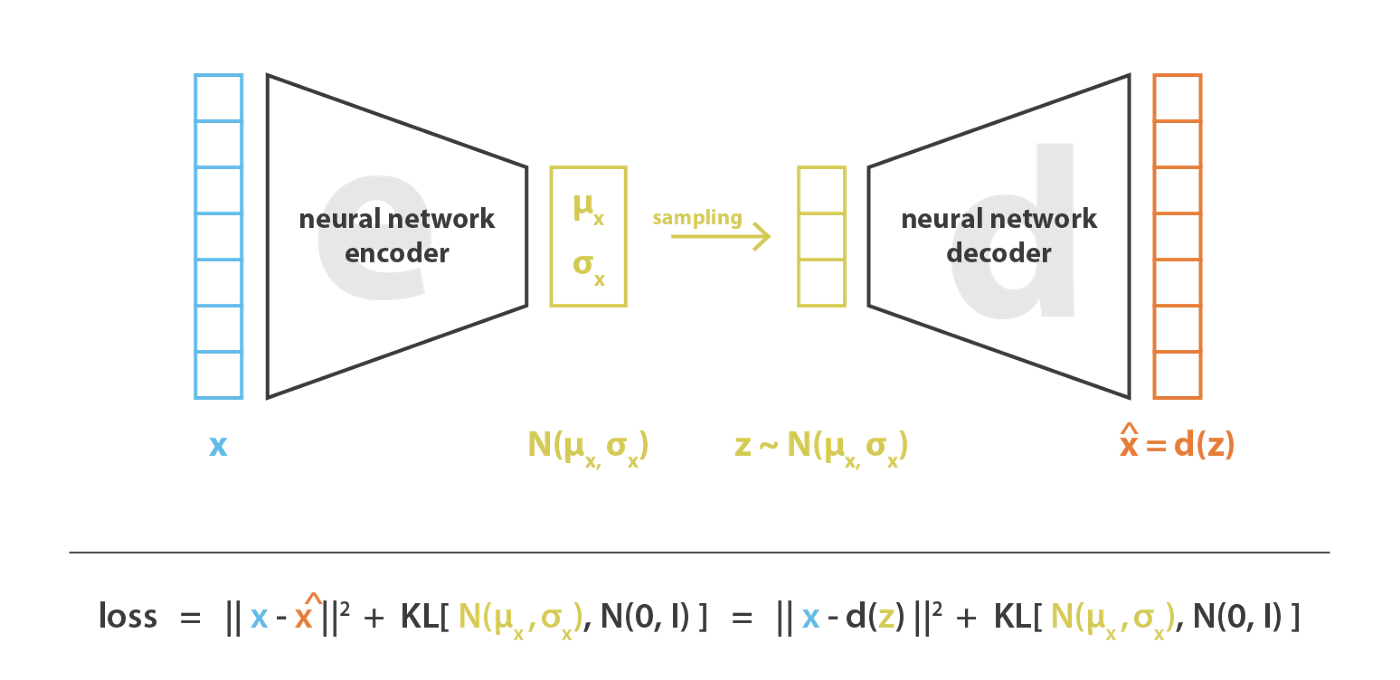

In [1]:
from IPython.display import Image
Image(filename='vae.png')

## Background
Variational Autoencoders have grown popular since their initial design proposed in a 2013 paper called ["Auto-Encoding Variational Bayes"](https://arxiv.org/abs/1312.6114) by Diederik Kingma and Max Welling. However in order to understand VAEs you have to have a bit of background.

### Dimensionality Reduction
In many machine learning problems, it is important to reduce data dimensions. There are two types of dimensionality reduction, lossy and lossless. Lossy implies you loose some information during reconstruction where lossless implies you do not loose any information. The key to any good dimensionality reduction algorithm is to keep the most information during compression and reduce the error it takes to reconstruct the data.

One popular dimensionality reduction algorithm is called [Principle Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). PCA makes [linear combinations](https://www.youtube.com/watch?v=k7RM-ot2NWY) of old features to make new independent features. These combinations allow the projection of the data from the old space to the new space to maintain as much information as possible. Basically, PCA is looking for the best linear subspace to represent the data. If you want more information follow the link [here](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73).

So, PCA is attempting to encode the data by forcing feature independence (orthonormal feature rows). It creates this independence through finding the orthogonal vectors (eigenvectors) of the covariance matrix that correspond to the largest eigenvalues. This gives PCA the best subspace to encode the data. PCA can then be decoded using the transpose of the encoder matrix. Do note, PCA is often times a lossy compression technique.

### Autoencoders
[Autoencoders](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798) are by nature unsupervised lossy dimensionality reduction neural networks. VAEs, as implied by the name, are derivations of standard autoencoders. These networks were designed to learn "encodings" of unlabeled input and then given those encodings be able to reconstruct the initial data. Standard autoencoders are broken down into two components, the encoder and the decoder. As the names imply, the encoder "encodes" the data to compressed encodings (called the latent space) and the decoder "decodes" the latent space to the original data. In fact, they act almost exactly like PCA with one big exception; they don't force the new features to be independent. Therefore, given enough [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)) it is theoretically possible to reduce any dimensionality to 1.

### Bayesian Statistical Inference
Statistics is obviously important in any area of machine learning, but especially important in understanding Variational Autoencoders. Statistics can be divided into two different ways of thought: [Bayesian and Frequentist](https://towardsdatascience.com/statistics-are-you-bayesian-or-frequentist-4943f953f21b). The difference is Bayesianists believe the parameter involved in an experiment is a random variable where Frequentists believe the parameter is not a random variable. While both are useful (Naive Bayes Classifiers, Maximum Likelihood Estimation, etc.) with VAEs we primarily work from the Bayesian school of thought. In fact, VAEs are rooted in Bayes Theorem:

$$
p(z|x) = \frac{p(x|z)p(z)}{p(x)} = \frac{p(x|z)p(z)}{\int p(x|u)p(u)du}
$$

However, in order to achieve this form we must make some assumptions about VAEs regarding Gaussian (Normal) distributions. Just as a quick reminder, these distributions are defined by the mean ($\mu$) and standard deviation ($\sigma$), or in vector form, the mean vector ($\mu$) and the covariance matrix ($\Sigma$). They form a bell-like shape curve and the Empirical Rule states that 95% of data falls within 2 standard deviations of the mean (99.7% of data within 3 standard deviations).

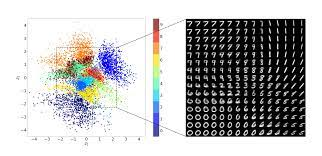

In [2]:
from IPython.display import Image
Image(filename='latent_space.jpeg')

## VAEs
Therefore, [Variational Autoencoders](https://arxiv.org/abs/1606.05908) are unsupervised models that compress data to a latent space and then from that latent space are able to reconstruct the data. The difference, is in the latent space VAEs use [variational inference](https://arxiv.org/abs/1601.00670) to determine how to best construct the latent space.

To start with, we make the assumption that $x$ is our input data and it can be generated by the latent space $z$ which is not observed. This seems backwards but just stay with me. Our encoder compresses $x$ to $p(z)$, the prior distribution of $z$, and variational inference infers $z$ from it. Then, $\hat{x}$ is reconstructed from the conditional likelihood $p(x|z)$.

That's a lot of math, so lets simplify it. Our encoder is defined by $p(z|x)$ and our decoder is $p(x|z)$. Our latent space is $z$ and sampled from the encoded distribution. That's really all it is, those 3 parts, encoder, variational inference, decoder. Take a look at the picture above and see if you can understand how it works out now. A hint, the encoded distribution $p(z)$ is a normal distribution.

### Ok, so Why do we Care?
So, you might be wondering what the point of all this encoding and decoding is if you're just getting the same information at the end of the day. Well, VAEs are considered ["generative models"](https://en.wikipedia.org/wiki/Generative_model) and have seen success in "generating" data. This is due to the sampling of the latent space distribution. It's sampling prevents it from perfectly reconstructing the input and can be tailored to be more or less precise based on the training. *DO NOTE: If you allow too many degrees of freedom in your system any autoencoder will severely overfit and lead to pointless latent spaces.*

The final part of VAEs is the loss function used to train them. The training function is described by something called Kullback-Leibler (KL) Divergence and the "Reconstruction Error". The equation is given above and if you want more information about them please check out one of the tutorials linked above. Its a complex loss function and the important part to note is KL divergence intends to minimize the distance between the two distributions $q(z)$ and $p(z)$ inside variational inferencing. The reconstruction error attempts to keep the distributions apart. So within the loss function you have one portion minimizing and another keeping them apart. This allows the model to generate data $\hat{x}$ ~ $x$.

Another note, VAEs are trained using gradient descent and backpropagation as well, just note in order to get over the latent space sampling they have a little technique called the reparametrization trick. You'll hear it often in VAEs, its just a way to jump the gap from decoder to encoder.